# Data Exploration

## Background

### What is EEG?
EEG is a signal pattern that is obtained by amplifying and recording the spontaneous biological potential of the brain on the scalp. This potential has been shown to reflect the macroscopic activity of the brain surface and is typically acquired using noninvasive electrodes applied onto the scalp.

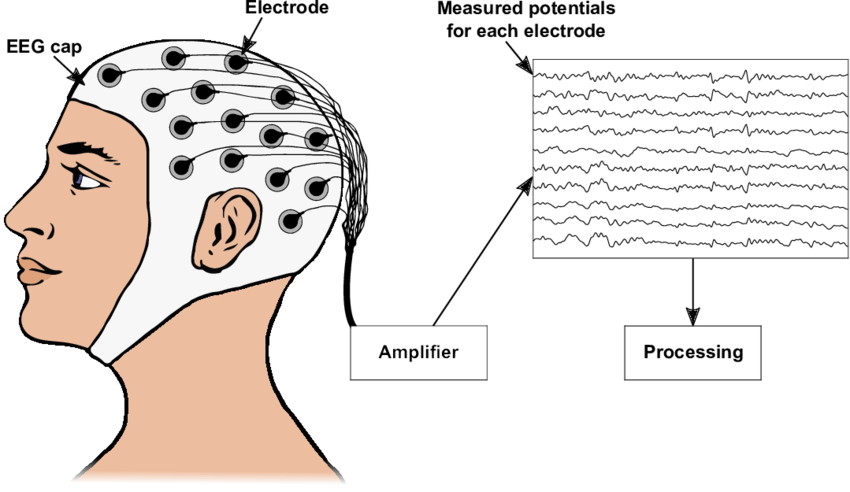

### Goal

The goal of this research is to develop a electroencephalography pattern classification model trained on electroencephalography (EEG) signals recorded from critically ill hospital patients so that it can more accurately detect seizures and other harmful brain activity.

#### Six Patterns Focused In This Research 
1. seizure (__SZ__)
2. generalized rhythmic delta activity (__GPD__)
3. lateralized periodic discharges (__LPD__)
4. lateralized rhythmic delta activity (__LRDA__)
5. generalized rhythmic delta activity (__GRDA__)
6. other

### EEG Patterns with Different Levels of Expert Agreement

1. __Idealized__ - segments with high levels of agreement.
2. __Proto__ - segments with 50% of "other" label and 50% of the remaining five labels.
3. __Edge__ - segments with 2-5 named patterns.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### train.csv

In dataset,  each EEG (electroencephalogram) recording is associated with a corresponding spectrogram. A spectrogram is a visual representation of the frequencies of a signal as they vary with time.

The dataset includes 50-second long EEG samples, and for each sample, there is a matched spectrogram covering 10 a-minute window centered at the same time and the expert annotators labeled the central 10 seconds. </br></br>


- __eeg_id__ - A unique identifier for the entire EEG recording. </br>
- __eeg_sub_id__ - An ID for the specific 50 second long subsample this row's labels apply to.</br>
- __eeg_label_offset_seconds__ - The time between the beginning of the consolidated EEG and this subsample.</br>
- __spectrogram_id__ - A unique identifier for the entire EEG recording.</br>
- __spectrogram_sub_id__ - An ID for the specific 10 minute subsample this row's labels apply to.</br>
- __spectogram_label_offset_seconds__ - The time between the beginning of the consolidated spectrogram and this subsample.</br>
- __label_id__ - An ID for this set of labels.</br>
- __patient_id__ - An ID for the patient who donated the data.</br>
- __expert_consensus__ - The consensus annotator label. Provided for convenience only.</br>
- __[seizure/lpd/gpd/lrda/grda/other]_vote__ - The count of annotator votes for a given brain activity class. The full names of the activity classes are as follows: _lpd_: lateralized periodic discharges, _gpd_: generalized periodic discharges, _lrd_: lateralized rhythmic delta activity, and _grda_: generalized rhythmic delta activity.

### Question
1. How exactly do subsampling and offset labeling work?
2. A eeg_id has at most 1 spectrogram, but a spectrogram can cover multiple eeg_id. How?
3. train.csv is associated with 106,800 rows but there are only 17089 unique eeg_ids, 11138 unique spectrogram_ids, and 1950 unique patients. How?


### Refer to
1. https://www.kaggle.com/code/morodertobias/hms-data-inspection
2. https://www.kaggle.com/competitions/hms-harmful-brain-activity-classification/discussion/468010

In [7]:
train = pd.read_csv("/Users/ganghwayeon/train.csv")
train

,eeg_id,eeg_sub_id,eeg_label_offset_seconds,spectrogram_id,spectrogram_sub_id,spectrogram_label_offset_seconds,label_id,patient_id,expert_consensus,seizure_vote,lpd_vote,gpd_vote,lrda_vote,grda_vote,other_vote
0,1628180742,0,0.0,353733,0,0.0,127492639,42516,Seizure,3,0,0,0,0,0
1,1628180742,1,6.0,353733,1,6.0,3887563113,42516,Seizure,3,0,0,0,0,0
2,1628180742,2,8.0,353733,2,8.0,1142670488,42516,Seizure,3,0,0,0,0,0
3,1628180742,3,18.0,353733,3,18.0,2718991173,42516,Seizure,3,0,0,0,0,0
4,1628180742,4,24.0,353733,4,24.0,3080632009,42516,Seizure,3,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106795,351917269,6,12.0,2147388374,6,12.0,4195677307,10351,LRDA,0,0,0,3,0,0
106796,351917269,7,14.0,2147388374,7,14.0,290896675,10351,LRDA,0,0,0,3,0,0
106797,351917269,8,16.0,2147388374,8,16.0,461435451,10351,LRDA,0,0,0,3,0,0
106798,351917269,9,18.0,2147388374,9,18.0,3786213131,10351,LRDA,0,0,0,3,0,0


In [6]:
train.head(50)

,eeg_id,eeg_sub_id,eeg_label_offset_seconds,spectrogram_id,spectrogram_sub_id,spectrogram_label_offset_seconds,label_id,patient_id,expert_consensus,seizure_vote,lpd_vote,gpd_vote,lrda_vote,grda_vote,other_vote
0,1628180742,0,0.0,353733,0,0.0,127492639,42516,Seizure,3,0,0,0,0,0
1,1628180742,1,6.0,353733,1,6.0,3887563113,42516,Seizure,3,0,0,0,0,0
2,1628180742,2,8.0,353733,2,8.0,1142670488,42516,Seizure,3,0,0,0,0,0
3,1628180742,3,18.0,353733,3,18.0,2718991173,42516,Seizure,3,0,0,0,0,0
4,1628180742,4,24.0,353733,4,24.0,3080632009,42516,Seizure,3,0,0,0,0,0
5,1628180742,5,26.0,353733,5,26.0,2413091605,42516,Seizure,3,0,0,0,0,0
6,1628180742,6,30.0,353733,6,30.0,364593930,42516,Seizure,3,0,0,0,0,0
7,1628180742,7,36.0,353733,7,36.0,3811483573,42516,Seizure,3,0,0,0,0,0
8,1628180742,8,40.0,353733,8,40.0,3388718494,42516,Seizure,3,0,0,0,0,0
9,2277392603,0,0.0,924234,0,0.0,1978807404,30539,GPD,0,0,5,0,1,5


In [4]:
test = pd.read_csv("/Users/ganghwayeon/test.csv")
test

,spectrogram_id,eeg_id,patient_id
0,853520,3911565283,6885
